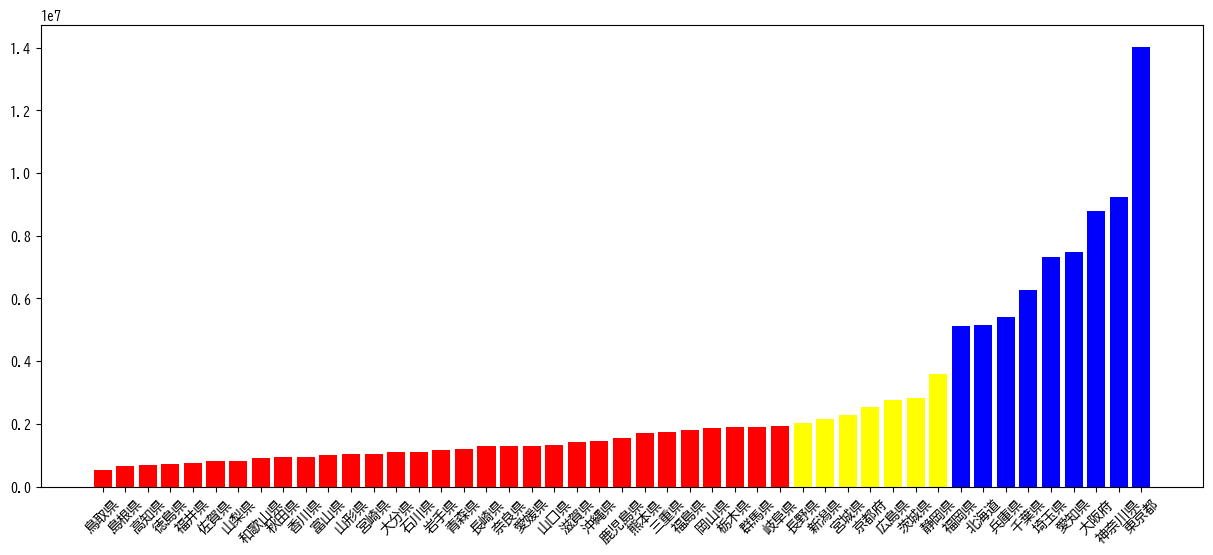

In [65]:
import csv
import collections
import matplotlib
import matplotlib.pyplot
from matplotlib import rcParams

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['BIZ UDGothic']
rcParams['font.size'] = 10


csvfilename='population.csv'

Population = collections.namedtuple("Population",["prefecture","population"])
population_list:list[Population] = []
with open(csvfilename,newline='',encoding="utf-8") as csvfile:
    spamreader = csv.DictReader(csvfile)
    for row in spamreader:
        if row['調査年'] == '2022年度':
            if row['地域'] != '全国':
                population_list.append(Population(row['地域'],int(row['A1101_総人口【人】'].replace(",",""))))
population_list.sort(key=lambda p:p.population)

populations:list[int]=[]
prefectures:list[str]=[]
colors:list[str]=[]

for prefecture,population in population_list:
    populations.append(population)
    prefectures.append(prefecture)
    if population<2000000:
        colors.append('red')
    elif population<5000000:
        colors.append('yellow')
    else:
        colors.append('blue')
    # print(prefecture,population)

matplotlib.pyplot.figure(figsize=(15,6))
matplotlib.pyplot.bar(prefectures,populations,color=colors,width=0.8)
matplotlib.pyplot.xticks(rotation=45)
matplotlib.pyplot.savefig("plot.png")